# Lab 1 - Big Data Frameworks II
## 27/11/2022 - Adrien Leblanc

In [1]:
!apt-get install openjdk-8-jdk-headless -qq> /dev/null

In [2]:
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [3]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [4]:
!pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# set spark folder to the system path env
import os
os.environ["JAVA_home"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv
Saving CallsData.csv to CallsData.csv
Saving ContractData.csv to ContractData.csv
Saving ContratCallsData2.csv to ContratCallsData2.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [8]:
!ls

BostonHousing.csv  ContratCallsData2.csv      spark-3.0.0-bin-hadoop3.2.tgz
CallsData.csv	   sample_data
ContractData.csv   spark-3.0.0-bin-hadoop3.2


In [9]:
dataset = spark.read.csv('BostonHousing.csv', inferSchema=True, header=True)

In [10]:
dataset.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [11]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

In [12]:
# input features in one vector column

assembler = VectorAssembler(inputCols=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat'], outputCol='Attributes')
output = assembler.transform(dataset)

# input vs output

finalized_data = output.select("Attributes","medv")
finalized_data.show()

+--------------------+----+
|          Attributes|medv|
+--------------------+----+
|[0.00632,18.0,2.3...|24.0|
|[0.02731,0.0,7.07...|21.6|
|[0.02729,0.0,7.07...|34.7|
|[0.03237,0.0,2.18...|33.4|
|[0.06905,0.0,2.18...|36.2|
|[0.02985,0.0,2.18...|28.7|
|[0.08829,12.5,7.8...|22.9|
|[0.14455,12.5,7.8...|27.1|
|[0.21124,12.5,7.8...|16.5|
|[0.17004,12.5,7.8...|18.9|
|[0.22489,12.5,7.8...|15.0|
|[0.11747,12.5,7.8...|18.9|
|[0.09378,12.5,7.8...|21.7|
|[0.62976,0.0,8.14...|20.4|
|[0.63796,0.0,8.14...|18.2|
|[0.62739,0.0,8.14...|19.9|
|[1.05393,0.0,8.14...|23.1|
|[0.7842,0.0,8.14,...|17.5|
|[0.80271,0.0,8.14...|20.2|
|[0.7258,0.0,8.14,...|18.2|
+--------------------+----+
only showing top 20 rows



In [13]:
#split dataset
train_data,test_data = finalized_data.randomSplit([0.8,0.2])

In [14]:
from IPython.testing import test
regressor = LinearRegression(featuresCol='Attributes', labelCol='medv')
#fit model from train set
regressor = regressor.fit(train_data)

#predict prices on test set
pred = regressor.evaluate(test_data)

#predict model
pred.predictions.show()

+--------------------+----+------------------+
|          Attributes|medv|        prediction|
+--------------------+----+------------------+
|[0.01096,55.0,2.2...|22.0| 27.60627478718422|
|[0.01501,80.0,2.0...|24.5|27.531217260351525|
|[0.01778,95.0,1.4...|32.9|30.685134578608356|
|[0.0187,85.0,4.15...|23.1|25.236107233508843|
|[0.02177,82.5,2.0...|42.3| 37.30722069690597|
|[0.02187,60.0,2.9...|31.1| 32.24717646736025|
|[0.03041,0.0,5.19...|18.5|19.166929861288352|
|[0.03049,55.0,3.7...|31.2|  28.4354490161788|
|[0.0315,95.0,1.47...|34.9|30.054334967787636|
|[0.03306,0.0,5.19...|20.6| 21.96006235815663|
|[0.03548,80.0,3.6...|20.9| 21.76197315254866|
|[0.03578,20.0,3.3...|45.4| 39.30375561966527|
|[0.03615,80.0,4.9...|27.9|31.545814580061354|
|[0.03705,20.0,3.3...|35.4| 34.53731298349525|
|[0.04011,80.0,1.5...|33.3| 36.42697313781645|
|[0.0456,0.0,13.89...|23.3|26.439780277603557|
|[0.04666,80.0,1.5...|30.3| 33.16872968931635|
|[0.04932,33.0,2.1...|28.2| 32.52560944563219|
|[0.05023,35.

In [15]:
#coeff of the model
coeff = regressor.coefficients
#X and Y intercept
intr = regressor.intercept
print('The coefficient of the model is : %a' %coeff)
print('The intercept of the model is : %f' %intr)

The coefficient of the model is : DenseVector([-0.1201, 0.0414, 0.0496, 2.3856, -19.672, 4.2999, -0.0002, -1.3913, 0.2928, -0.0127, -0.9857, 0.0088, -0.4658])
The intercept of the model is : 34.273315


In [16]:
#Evaluation of the model

from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")

#root mean square error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" %rmse)

#Mean square error
mse = eval.evaluate(pred.predictions, {eval.metricName:"mse"})
print("MSE: %.3f" %mse)

#Mean absolute error
mae = eval.evaluate(pred.predictions, {eval.metricName:"mae"})
print("MAE: %.3f" %mae)

RMSE: 4.959
MSE: 24.588
MAE: 3.124


In [17]:
# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName:"r2"})
print("r2: %.3f" %r2)

r2: 0.706


In [18]:
#Clustering the dataset
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [19]:

#Trains a k-means model
kmeans = KMeans(featuresCol='Attributes').setK(2).setSeed(1)
model = kmeans.fit(finalized_data)

#make predictions
predictions = model.transform(finalized_data)
predictions.show()

+--------------------+----+----------+
|          Attributes|medv|prediction|
+--------------------+----+----------+
|[0.00632,18.0,2.3...|24.0|         0|
|[0.02731,0.0,7.07...|21.6|         0|
|[0.02729,0.0,7.07...|34.7|         0|
|[0.03237,0.0,2.18...|33.4|         0|
|[0.06905,0.0,2.18...|36.2|         0|
|[0.02985,0.0,2.18...|28.7|         0|
|[0.08829,12.5,7.8...|22.9|         0|
|[0.14455,12.5,7.8...|27.1|         0|
|[0.21124,12.5,7.8...|16.5|         0|
|[0.17004,12.5,7.8...|18.9|         0|
|[0.22489,12.5,7.8...|15.0|         0|
|[0.11747,12.5,7.8...|18.9|         0|
|[0.09378,12.5,7.8...|21.7|         0|
|[0.62976,0.0,8.14...|20.4|         0|
|[0.63796,0.0,8.14...|18.2|         0|
|[0.62739,0.0,8.14...|19.9|         0|
|[1.05393,0.0,8.14...|23.1|         0|
|[0.7842,0.0,8.14,...|17.5|         0|
|[0.80271,0.0,8.14...|20.2|         0|
|[0.7258,0.0,8.14,...|18.2|         0|
+--------------------+----+----------+
only showing top 20 rows



In [49]:
#Churn analysis in Spark

datasetCalls = spark.read.csv('CallsData.csv', header=True, inferSchema=True)
datasetContract = spark.read.csv('ContractData.csv', header=True, inferSchema=True)

datasetCalls.show(3)
datasetContract.show(3)

+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|Area Code|   Phone|
+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|           25|   265.1|   197.4|     244.7|     10.0|             1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|      415|382-4657|
|           26|   161.6|   195.5|     254.4|     13.7|             1|      123|     27.47|      103|     16.62|        103|       11.45|         3|        3.7|      415|371-7191|
|            0|   243.4|   121.2|     162.6|     12.2|             0|      114|     41.38|      110|     

In [50]:
# Left join the 2 datasets on the phone number
dataset = datasetContract.join(datasetCalls,datasetContract.Phone ==  datasetCalls.Phone,"left")


In [51]:
dataset.show(5)

+--------------+-----+----------+----------+-----+---------+--------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|Account Length|Churn|Int'l Plan|VMail Plan|State|Area Code|   Phone|VMail Message|Day Mins|Eve Mins|Night Mins|Intl Mins|CustServ Calls|Day Calls|Day Charge|Eve Calls|Eve Charge|Night Calls|Night Charge|Intl Calls|Intl Charge|Area Code|   Phone|
+--------------+-----+----------+----------+-----+---------+--------+-------------+--------+--------+----------+---------+--------------+---------+----------+---------+----------+-----------+------------+----------+-----------+---------+--------+
|           128|    0|         0|         1|   KS|      415|382-4657|           25|   265.1|   197.4|     244.7|     10.0|             1|      110|     45.07|       99|     16.78|         91|       11.01|         3|        2.7|      415|382-4657|
|           

In [52]:
dataset.printSchema()
print(f"dataset Columns count : {len(dataset.columns)}\n")

root
 |-- Account Length: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- Int'l Plan: integer (nullable = true)
 |-- VMail Plan: integer (nullable = true)
 |-- State: string (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)
 |-- VMail Message: integer (nullable = true)
 |-- Day Mins: double (nullable = true)
 |-- Eve Mins: double (nullable = true)
 |-- Night Mins: double (nullable = true)
 |-- Intl Mins: double (nullable = true)
 |-- CustServ Calls: integer (nullable = true)
 |-- Day Calls: integer (nullable = true)
 |-- Day Charge: double (nullable = true)
 |-- Eve Calls: integer (nullable = true)
 |-- Eve Charge: double (nullable = true)
 |-- Night Calls: integer (nullable = true)
 |-- Night Charge: double (nullable = true)
 |-- Intl Calls: integer (nullable = true)
 |-- Intl Charge: double (nullable = true)
 |-- Area Code: integer (nullable = true)
 |-- Phone: string (nullable = true)

dataset Columns count : 23



In [53]:
dataset.describe().show()

+-------+------------------+-------------------+------------------+-------------------+-----+------------------+--------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+--------+
|summary|    Account Length|              Churn|        Int'l Plan|         VMail Plan|State|         Area Code|   Phone|     VMail Message|          Day Mins|          Eve Mins|        Night Mins|         Intl Mins|    CustServ Calls|         Day Calls|        Day Charge|         Eve Calls|        Eve Charge|       Night Calls|     Night Charge|        Intl Calls|       Intl Charge|         Area Code|   Phone|
+-------+------------------+-------------------+------------------+-------------------+-----+------------------+--------+------------------+------------------+-----------

The data is multivariate because we have several features.

In [98]:
#Normalization
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

features_col = ['Account Length', "Int'l Plan",'VMail Plan', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge']
vec_assembler = VectorAssembler(inputCols = features_col, outputCol='features')
final_data = vec_assembler.transform(dataset)

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=False)
scalerModel = scaler.fit(final_data)
cluster_final_data = scalerModel.transform(final_data)

Every dataset does not require normalization. It is required only when features have different ranges.

In [99]:
# Clustering with K-means

kmeans18 = KMeans(featuresCol='scaledFeatures',k=18)
kmeans10 = KMeans(featuresCol='scaledFeatures',k=10)
kmeans5 = KMeans(featuresCol='scaledFeatures',k=5)
kmeans3 = KMeans(featuresCol='scaledFeatures',k=3)
kmeans2 = KMeans(featuresCol='scaledFeatures',k=2)

In [100]:
model18 = kmeans18.fit(cluster_final_data)
model10 = kmeans10.fit(cluster_final_data)
model5 = kmeans5.fit(cluster_final_data)
model3 = kmeans3.fit(cluster_final_data)
model2 = kmeans2.fit(cluster_final_data)

In [101]:
# Make predictions
predictions18 = model18.transform(cluster_final_data)
predictions10 = model10.transform(cluster_final_data)
predictions5 = model5.transform(cluster_final_data)
predictions3 = model3.transform(cluster_final_data)
predictions2 = model2.transform(cluster_final_data)

In [102]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions18)
print("With k=18 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions10)
print("With k=10 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions5)
print("With k=5 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions3)
print("With k=3 Silhouette with squared euclidean distance = " + str(silhouette))
silhouette = evaluator.evaluate(predictions2)
print("With k=2 Silhouette with squared euclidean distance = " + str(silhouette))

With k=18 Silhouette with squared euclidean distance = -0.03458990013228553
With k=10 Silhouette with squared euclidean distance = -0.04853339116626266
With k=5 Silhouette with squared euclidean distance = 0.10219139540541831
With k=3 Silhouette with squared euclidean distance = 0.08874358317835501
With k=2 Silhouette with squared euclidean distance = 0.23681608723557518


In [103]:
silhouette_scores=[]

for k in range(2,11):
    kmeans = KMeans(featuresCol='scaledFeatures',k=k)
    model = kmeans.fit(cluster_final_data)
    predictions = model.transform(cluster_final_data)
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_scores.append(silhouette)
    print("With K={}".format(k))
    print("Silhouette with squared euclidean distance = " + str(silhouette))
    print('--'*30)

With K=2
Silhouette with squared euclidean distance = 0.23681608723557518
------------------------------------------------------------
With K=3
Silhouette with squared euclidean distance = 0.08874358317835501
------------------------------------------------------------
With K=4
Silhouette with squared euclidean distance = 0.09520265015253092
------------------------------------------------------------
With K=5
Silhouette with squared euclidean distance = 0.10219139540541831
------------------------------------------------------------
With K=6
Silhouette with squared euclidean distance = 0.045415614852410205
------------------------------------------------------------
With K=7
Silhouette with squared euclidean distance = 0.04744679156766194
------------------------------------------------------------
With K=8
Silhouette with squared euclidean distance = 0.015589813218576113
------------------------------------------------------------
With K=9
Silhouette with squared euclidean distance =

Text(0, 0.5, 'Silhouette Score')

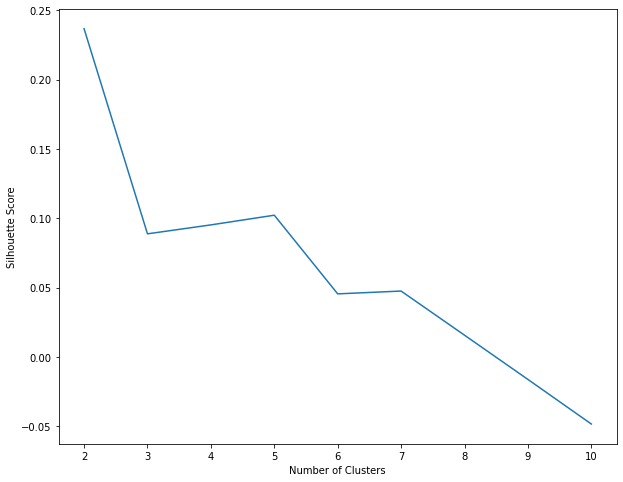

In [104]:
#Visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(10,8))
ax.plot(range(2,11),silhouette_scores[0:9])
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

In [114]:
model2.transform(cluster_final_data).groupBy('prediction').count().orderBy('prediction').show()
model5.transform(cluster_final_data).groupBy('prediction').count().orderBy('prediction').show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0| 1642|
|         1| 1691|
+----------+-----+

+----------+-----+
|prediction|count|
+----------+-----+
|         0|  887|
|         1|  591|
|         2|  658|
|         3|  573|
|         4|  624|
+----------+-----+



The best number of k-neighbour is probably 2 or 5 as a local maximum. Plots will help to confirm that.

Scikit-learn documentation says : "Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster."

The dimension reduction suits this task because it is impossible to visualize the data over 3dimensions

In [107]:
# Dimension reduction with PCA

from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(cluster_final_data)
pca_transformed = pca_model.transform(cluster_final_data)

In [118]:
import numpy as np
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())
cluster_assignment2 = np.array(predictions2.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)
cluster_assignment5 = np.array(predictions5.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

In [115]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

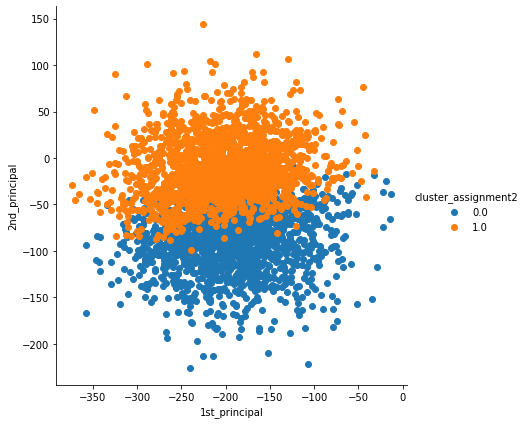

In [119]:
#2 clusters
pca_data = np.hstack((x_pca,cluster_assignment2))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment2"))
sns.FacetGrid(pca_df,hue="cluster_assignment2", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

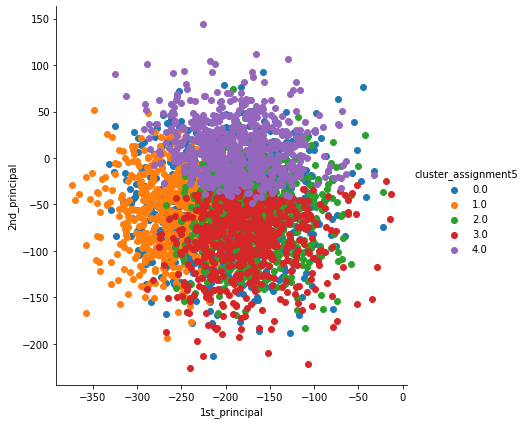

In [120]:
#5 clusters
pca_data = np.hstack((x_pca,cluster_assignment5))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment5"))
sns.FacetGrid(pca_df,hue="cluster_assignment5", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()

plt.show()

Best solution with K-means is 2 clusters since 5 gives completely overlayed groups due to 2D visualization.
Also, churn is binary so it makes more sense to keep 2 clusters.